# Crime Data Analysis
## Pandemic's effect on Quarantine 

#### (Proposal and Data in Hand Explanation)

For my project I plan to use Crime data from 2020 to Present in California, in order to evaluate how the pandemic and quarantine affected crime. To do so, I want to select certain time periods that had different circumstances, like March 2020 - January 2021 vs. March 2022 - January 2023 and compare the number of crimes committed, the types of crimes committed (with emphasis on petty crime), along with where and when in order to determine if the government regulated quarantine impacted crime.

https://www.kaggle.com/datasets/qnqfbqfqo/crime-data-from-2020-to-present

The dataset I collected in order to do my analysis is from Kaggle.  I understand is not always the most trustworthy or reliable, however when looking at my specific data that doesnt appear to the case. There are minimal n/a values and where there are some, they are typically in columns that I would not be looking at.

The data itself is 815,882 entries, but filtering out the dates that will not be used will certainly reduce that number. If I were to guess I am probably around ~400,000 entries. There are 18 total columns/variables, however I will realistically look at ~10, with a mixture of categorical (like victim sex and descent) and numerical (like time & crime code).

#### (Analysis Plan)

The plan for my report involves looking 'Crm Cd Desc' (actual crime committed), versus a number of different variables to see the correlation. While using different variable I will also be looking at different time periods. My idea is to create a variety of histograms/barplots for the three time periods. For example, I hope to plot the amount/count of crimes committed over the areas to see which areas have higher crime, then I can compare them against the following and matching two year 

In [2]:
import requests
import pandas as pd
import base64
import json
import urllib
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from datetime import datetime as dt

In [3]:
Crime_Data = pd.read_csv('Crime_Data.csv')

In [4]:
Crime_Data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [5]:
pd.Timestamp(Crime_Data['Date Rptd'].iloc[0])

Timestamp('2020-01-08 00:00:00')

In [6]:
Crime_Data['Date Reported'] = [pd.Timestamp(x) for x in Crime_Data['Date Rptd']]

In [7]:
Crime_Data['Date Occured'] = [pd.Timestamp(x) for x in Crime_Data['DATE OCC']]

In [8]:
Crime_Data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Date Reported,Date Occured
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,2020-01-08,2020-01-08
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,2020-01-02,2020-01-01
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,2020-04-14,2020-02-13
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,2020-01-01,2020-01-01
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,2020-01-01,2020-01-01


Data pre-processing and cleaning, removing comlumns that will not be used, like LAT & LON

In [9]:
#example: finaldfold = joined_dfold.drop(columns=['available_markets', 'disc_number','type_y', 'uri_y', 'track_href','preview_url','is_local' ,'uri_x', 'analysis_url', 'duration_ms_y', 'duration_ms_x','external_ids', 'external_urls', 'href'])

In [12]:
Cleaned_Crime_Data = Crime_Data.drop(columns = ['Part 1-2','Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'LAT', 'LON'])

In [13]:
Cleaned_Crime_Data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,...,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Date Reported,Date Occured
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,...,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,2020-01-08,2020-01-08
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,...,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,2020-01-02,2020-01-01
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,...,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,200 E 6TH ST,2020-04-14,2020-02-13
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,...,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,5400 CORTEEN PL,2020-01-01,2020-01-01
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,14400 TITUS ST,2020-01-01,2020-01-01


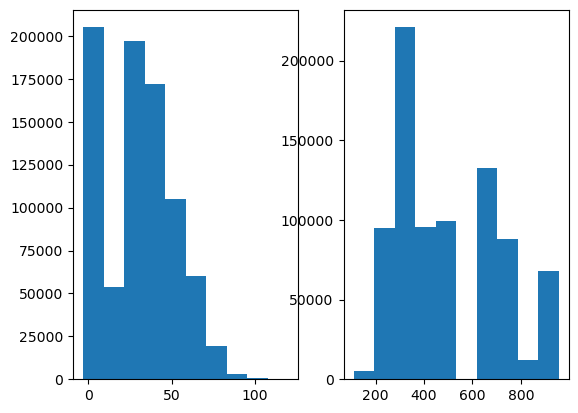

In [17]:
fig1, ax1 = plt.subplots(1, 2)
ax1[0].hist(Cleaned_Crime_Data['Vict Age'])
ax1[1].hist(Cleaned_Crime_Data['Crm Cd'])

plt.show()

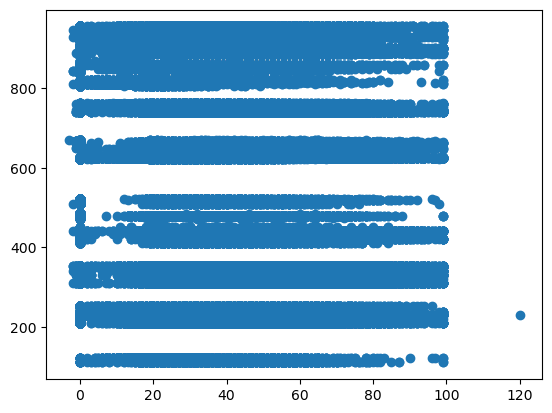

In [18]:
fig2, ax2 = plt.subplots()
ax2.scatter(x = Cleaned_Crime_Data['Vict Age'],
            y = Cleaned_Crime_Data['Crm Cd'])

plt.show()

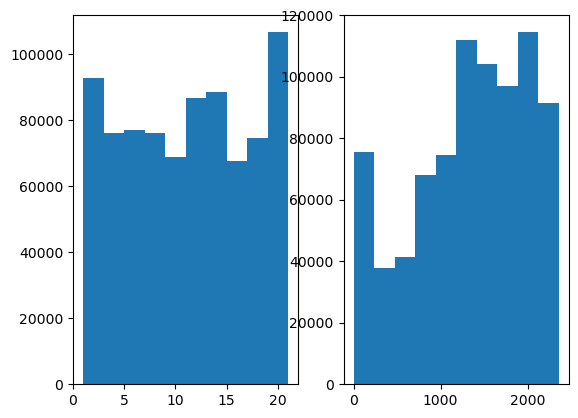

In [24]:
fig1, ax1 = plt.subplots(1, 2)
ax1[0].hist(Cleaned_Crime_Data['AREA'])
ax1[1].hist(Cleaned_Crime_Data['TIME OCC'])

plt.show()

The next steps for my project include sorting the data to create the date partitions, I can then create the visuals to use to compare the results of the differeing dates to see if I can uncover any trends or patterns that may have come as a result of the coronavirus.